In [1]:
# Import the packages
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
# Scrape the worldometer Covid live update with Beautiful Soup

# Import the url by creating a variable
url = 'https://www.worldometers.info/coronavirus/'

# Specify the url and request with get
page = requests.get(url)

# Connect to the website
if page.status_code == 200:
    html_doc = page.text
    
# Make contact to the page
print(page) 

<Response [200]>


<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   COVID Live - Coronavirus Statistics - Worldometer
  </title>
  <meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/favicon/apple-icon-60x60.png" rel="app
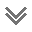

In [3]:
# Tell BeautifulSoup to look at the url
soup = BeautifulSoup(html_doc)

# Print the Soup output
print(soup.prettify())

In [4]:
# Find the table elements
table = soup.find('table', attrs = {'id': 'main_table_countries_today'})
print(table.prettify())

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
 <thead>
  <tr>
   <th width="1%">
    #
   </th>
   <th width="100">
    Country,
    <br/>
    Other
   </th>
   <th width="20">
    Total
    <br/>
    Cases
   </th>
   <th width="30">
    New
    <br/>
    Cases
   </th>
   <th width="30">
    Total
    <br/>
    Deaths
   </th>
   <th width="30">
    New
    <br/>
    Deaths
   </th>
   <th width="30">
    Total
    <br/>
    Recovered
   </th>
   <th width="30">
    New
    <br/>
    Recovered
   </th>
   <th width="30">
    Active
    <br/>
    Cases
   </th>
   <th width="30">
    Serious,
    <br/>
    Critical
   </th>
   <th width="30">
    Tot Cases/
    <br/>
    1M pop
   </th>
   <th width="30">
    Deaths/
    <br/>
    1M pop
   </th>
   <th width="30">
    Total
    <br/>
    Tests
   </th>
   <th width="30">
    Tests/
    <br/>
    <nobr>
     1M pop
    <

In [5]:
# Let's now extract all the rows
rows = table.find_all('tr')

rows

[<tr>
 <th width="1%">#</th>
 <th width="100">Country,<br/>Other</th>
 <th width="20">Total<br/>Cases</th>
 <th width="30">New<br/>Cases</th>
 <th width="30">Total<br/>Deaths</th>
 <th width="30">New<br/>Deaths</th>
 <th width="30">Total<br/>Recovered</th>
 <th width="30">New<br/>Recovered</th>
 <th width="30">Active<br/>Cases</th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 <th width="30">Deaths/<br/>1M pop</th>
 <th width="30">Total<br/>Tests</th>
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>
 <th width="30">Population</th>
 <th style="display:none" width="30">Continent</th>
 <th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
 <th width="30">New Cases/1M pop</th>
 <th width="30">New Deaths/1M pop</th>
 <th width="30">Active Cases/1M pop</th>
 </tr>,
 <tr class="total_row_world row_continent" data-continent="North America" style="display: none">
 <td></td>


In [6]:
# Store the output in a pandas DF

output = []

# Create headers 
column_names = ['Index','Country/Other', 'Total Cases', 'New Cases', 'Total Deaths',
                'New Deaths', 'Total Recovered', 'New Recovered', 'Active Cases',
                'Serious, Critical', 'Tot Cases/1m pop', 'Deaths/1m pop', 'Total Tests',
                'Tests/1m pop', 'Population']

# Create for loops that run through all the rows
for covid_country in rows:
    country_data = covid_country.find_all('td')
    if country_data:
        covid_text = [td.text for td in country_data]
        output.append(dict(zip(column_names, covid_text)))
        
output

[{'Index': '',
  'Country/Other': '\nNorth America\n',
  'Total Cases': '105,162,572',
  'New Cases': '+20,959',
  'Total Deaths': '1,486,260',
  'New Deaths': '+42',
  'Total Recovered': '98,730,846',
  'New Recovered': '+9,119',
  'Active Cases': '4,945,466',
  'Serious, Critical': '8,602',
  'Tot Cases/1m pop': '',
  'Deaths/1m pop': '',
  'Total Tests': '',
  'Tests/1m pop': '',
  'Population': ''},
 {'Index': '',
  'Country/Other': '\nAsia\n',
  'Total Cases': '161,021,757',
  'New Cases': '+36,719',
  'Total Deaths': '1,438,916',
  'New Deaths': '+128',
  'Total Recovered': '155,426,679',
  'New Recovered': '+31,228',
  'Active Cases': '4,156,162',
  'Serious, Critical': '10,471',
  'Tot Cases/1m pop': '',
  'Deaths/1m pop': '',
  'Total Tests': '',
  'Tests/1m pop': '',
  'Population': ''},
 {'Index': '',
  'Country/Other': '\nSouth America\n',
  'Total Cases': '59,516,179',
  'New Cases': '',
  'Total Deaths': '1,304,577',
  'New Deaths': '',
  'Total Recovered': '56,437,680',


In [7]:
# Pass the output into a Pandas DF 
data = pd.DataFrame(output)

data

Index      Country/Other  Total Cases New Cases Total Deaths New Deaths  \
0          \nNorth America\n  105,162,572   +20,959    1,486,260        +42   
1                   \nAsia\n  161,021,757   +36,719    1,438,916       +128   
2          \nSouth America\n   59,516,179              1,304,577              
3                 \nEurope\n  202,924,083              1,854,207              
4                \nOceania\n    9,727,090   +25,627       13,978        +43   
..    ...                ...          ...       ...          ...        ...   
241                   Total:  202,924,083              1,854,207              
242                   Total:    9,727,090   +25,627       13,978        +43   
243                   Total:   12,308,309                255,834              
244                   Total:          721                     15              
245                   Total:  550,660,711   +83,305    6,353,787       +213   

    Total Recovered New Recovered Active Cases Serious, Critical  \
0        98,730,846        +9,119    4,945,466             8,602   
1       155,426,679       +31,228    4,156,162            10,471   
2        56,437,680        +6,108    1,773,922            10,362   
3       194,880,839                  6,189,037             6,078   
4         9,334,058        +5,732      379,054               145   
..              ...           ...          ...               ...   
241     194,880,839                  6,189,037             6,078   
242       9,334,058        +5,732      379,054               145   
243      11,487,359                    565,116             1,008   
244             706                          0                 0   
245     526,298,167       +51,964   18,008,757            36,666   

    Tot Cases/1m pop Deaths/1m pop Total Tests Tests/1m pop Population  
0                                                                       
1                                                                       
2                                                                       
3                                                                       
4                                                                       
..               ...           ...         ...          ...        ...  
241                                                                     
242                                                                     
243                                                                     
244                                                                     
245         70,644.6         815.1                                      

[246 rows x 15 columns]

In [9]:
# Select relevant columns

data_final = data[['Country/Other','Total Deaths', 
                   'Total Cases', 'New Cases', 'Active Cases', 
                   'Serious, Critical', 'Total Recovered']]

data_final.head()

Country/Other Total Deaths  Total Cases New Cases Active Cases  \
0  \nNorth America\n    1,486,260  105,162,572   +20,959    4,945,466   
1           \nAsia\n    1,438,916  161,021,757   +36,719    4,156,162   
2  \nSouth America\n    1,304,577   59,516,179              1,773,922   
3         \nEurope\n    1,854,207  202,924,083              6,189,037   
4        \nOceania\n       13,978    9,727,090   +25,627      379,054   

  Serious, Critical Total Recovered  
0             8,602      98,730,846  
1            10,471     155,426,679  
2            10,362      56,437,680  
3             6,078     194,880,839  
4               145       9,334,058

### Convert the Pandas DataFrame as a CSV file

In [11]:
data.to_csv('data_final', index = False)

In [15]:
# Create and view a JSON output, note a DataFrame can not be passed as json

import json
json_output = json.dumps(output)
json_output

'[{"Index": "", "Country/Other": "\\nNorth America\\n", "Total Cases": "105,162,572", "New Cases": "+20,959", "Total Deaths": "1,486,260", "New Deaths": "+42", "Total Recovered": "98,730,846", "New Recovered": "+9,119", "Active Cases": "4,945,466", "Serious, Critical": "8,602", "Tot Cases/1m pop": "", "Deaths/1m pop": "", "Total Tests": "", "Tests/1m pop": "", "Population": ""}, {"Index": "", "Country/Other": "\\nAsia\\n", "Total Cases": "161,021,757", "New Cases": "+36,719", "Total Deaths": "1,438,916", "New Deaths": "+128", "Total Recovered": "155,426,679", "New Recovered": "+31,228", "Active Cases": "4,156,162", "Serious, Critical": "10,471", "Tot Cases/1m pop": "", "Deaths/1m pop": "", "Total Tests": "", "Tests/1m pop": "", "Population": ""}, {"Index": "", "Country/Other": "\\nSouth America\\n", "Total Cases": "59,516,179", "New Cases": "", "Total Deaths": "1,304,577", "New Deaths": "", "Total Recovered": "56,437,680", "New Recovered": "+6,108", "Active Cases": "1,773,922", "Seriou

In [16]:
# Dump the file we created as json into the folder as csv and json format
with open('covid_json', 'w') as f:
    json.dump(output, f)

data.to_csv('data_final', index = False)

In [25]:
# import both files and check the first 5 rows
data_csv = pd.read_csv('data_final')

count_blanks = data_csv.isna().sum().sum()

print('Blanks: ' + str(count_blanks))

data_csv.head()

Blanks: 944


Index      Country/Other  Total Cases New Cases Total Deaths  New Deaths  \
0    NaN  \nNorth America\n  105,162,572   +20,959    1,486,260        42.0   
1    NaN           \nAsia\n  161,021,757   +36,719    1,438,916       128.0   
2    NaN  \nSouth America\n   59,516,179       NaN    1,304,577         NaN   
3    NaN         \nEurope\n  202,924,083       NaN    1,854,207         NaN   
4    NaN        \nOceania\n    9,727,090   +25,627       13,978        43.0   

  Total Recovered New Recovered Active Cases Serious, Critical  \
0      98,730,846        +9,119    4,945,466             8,602   
1     155,426,679       +31,228    4,156,162            10,471   
2      56,437,680        +6,108    1,773,922            10,362   
3     194,880,839           NaN    6,189,037             6,078   
4       9,334,058        +5,732      379,054               145   

  Tot Cases/1m pop Deaths/1m pop Total Tests Tests/1m pop Population  
0              NaN           NaN         NaN          NaN        NaN  
1              NaN           NaN         NaN          NaN        NaN  
2              NaN           NaN         NaN          NaN        NaN  
3              NaN           NaN         NaN          NaN        NaN  
4              NaN           NaN         NaN          NaN        NaN

In [18]:
data_json = pd.read_json('covid_json')

data_json.head()

Index      Country/Other  Total Cases New Cases Total Deaths New Deaths  \
0        \nNorth America\n  105,162,572   +20,959    1,486,260        +42   
1                 \nAsia\n  161,021,757   +36,719    1,438,916       +128   
2        \nSouth America\n   59,516,179              1,304,577              
3               \nEurope\n  202,924,083              1,854,207              
4              \nOceania\n    9,727,090   +25,627       13,978        +43   

  Total Recovered New Recovered Active Cases Serious, Critical  \
0      98,730,846        +9,119    4,945,466             8,602   
1     155,426,679       +31,228    4,156,162            10,471   
2      56,437,680        +6,108    1,773,922            10,362   
3     194,880,839                  6,189,037             6,078   
4       9,334,058        +5,732      379,054               145   

  Tot Cases/1m pop Deaths/1m pop Total Tests Tests/1m pop Population  
0                                                                     
1                                                                     
2                                                                     
3                                                                     
4

In [19]:
# view the data types and column names
print(data_json.dtypes)
print(data_json.shape)

Index                object
Country/Other        object
Total Cases          object
New Cases            object
Total Deaths         object
New Deaths           object
Total Recovered      object
New Recovered        object
Active Cases         object
Serious, Critical    object
Tot Cases/1m pop     object
Deaths/1m pop        object
Total Tests          object
Tests/1m pop         object
Population           object
dtype: object
(246, 15)


In [20]:
# view the data types and column names
print(data_csv.dtypes)
print(data_csv.shape)

Index                float64
Country/Other         object
Total Cases           object
New Cases             object
Total Deaths          object
New Deaths           float64
Total Recovered       object
New Recovered         object
Active Cases          object
Serious, Critical     object
Tot Cases/1m pop      object
Deaths/1m pop         object
Total Tests           object
Tests/1m pop          object
Population            object
dtype: object
(246, 15)


In [21]:
# Create a subset of the data 

data_subset = data_json[['Country/Other','Total Deaths', 
                   'Total Cases', 'New Cases', 'Active Cases', 
                   'Serious, Critical', 'Total Recovered']]

data_subset

Country/Other Total Deaths  Total Cases New Cases Active Cases  \
0    \nNorth America\n    1,486,260  105,162,572   +20,959    4,945,466   
1             \nAsia\n    1,438,916  161,021,757   +36,719    4,156,162   
2    \nSouth America\n    1,304,577   59,516,179              1,773,922   
3           \nEurope\n    1,854,207  202,924,083              6,189,037   
4          \nOceania\n       13,978    9,727,090   +25,627      379,054   
..                 ...          ...          ...       ...          ...   
241             Total:    1,854,207  202,924,083              6,189,037   
242             Total:       13,978    9,727,090   +25,627      379,054   
243             Total:      255,834   12,308,309                565,116   
244             Total:           15          721                      0   
245             Total:    6,353,787  550,660,711   +83,305   18,008,757   

    Serious, Critical Total Recovered  
0               8,602      98,730,846  
1              10,471     155,426,679  
2              10,362      56,437,680  
3               6,078     194,880,839  
4                 145       9,334,058  
..                ...             ...  
241             6,078     194,880,839  
242               145       9,334,058  
243             1,008      11,487,359  
244                 0             706  
245            36,666     526,298,167  

[246 rows x 7 columns]

In [26]:
# Check the missing values in the new dataframe
count_blanks = data_subset.isnull().sum().sum()

print('Blanks: ' + str(count_blanks))

Blanks: 0


In [27]:
# Save the file once again as a csv
data.to_csv('data_subset', index = False)